In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

###Dataset Load

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

###Data Visualization

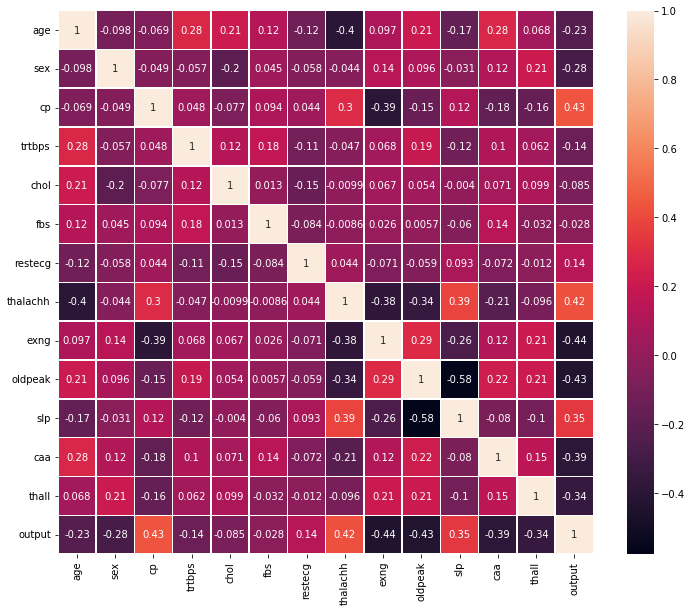

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, linewidths=.5, ax=ax)

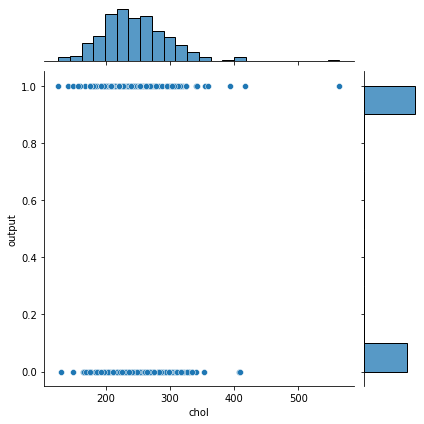

In [ ]:
sns.jointplot(x ='chol' , y = 'output' , data = df , kind = 'scatter')

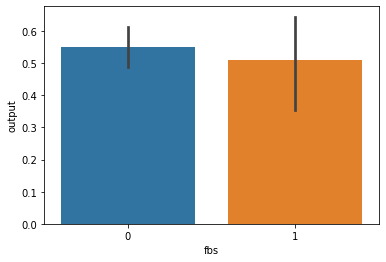

In [ ]:
sns.barplot('fbs','output',data=df)

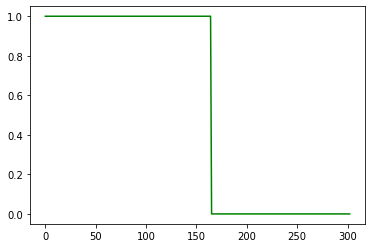

In [ ]:
plt.plot(df['output'], color = 'green')

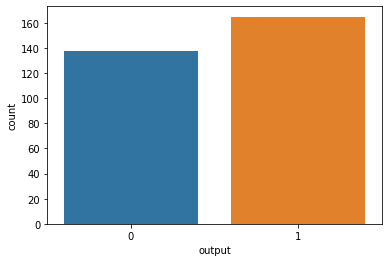

In [ ]:
sns.countplot('output',data=df)

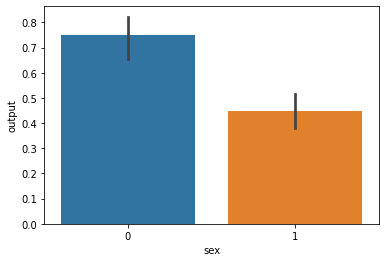

In [ ]:
sns.barplot('sex','output',data=df)

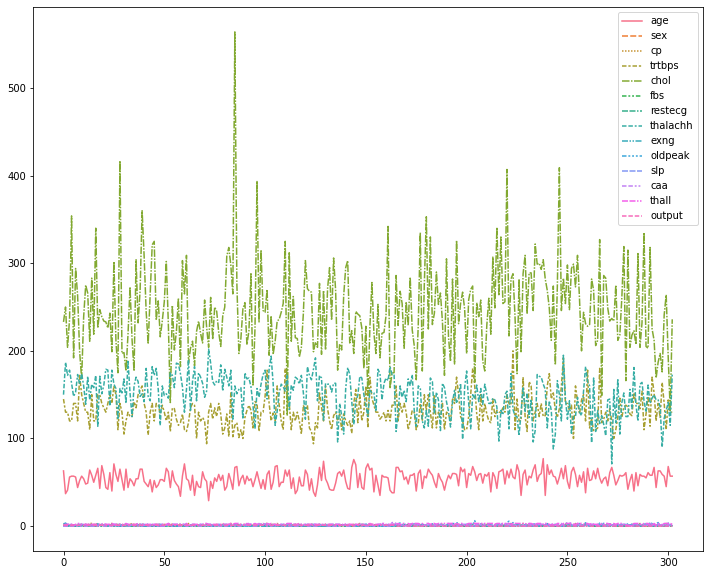

In [ ]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=df)

In [ ]:
df.drop('chol',axis=1, inplace=True)
df.drop('fbs',axis=1, inplace=True)
df.drop('trtbps',axis=1, inplace=True)
df.drop('restecg',axis=1, inplace=True)

In [ ]:
df.shape

(303, 10)

###Train-test Split

In [ ]:
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [ ]:
X_train

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall
219,48,1,0,150,1,0.0,2,2,3
186,60,1,0,144,1,1.4,2,1,3
287,57,1,1,164,0,0.0,2,1,2
242,64,1,0,132,0,2.0,1,2,1
302,57,0,1,174,0,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...
40,51,0,2,142,0,1.5,2,1,2
75,55,0,1,161,0,1.4,1,0,2
87,46,1,1,156,0,0.0,2,0,3
63,41,1,1,132,0,0.0,1,0,1


###Feature Scaling

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.50)
len(set(corr_features))

1

In [ ]:
corr_features

{'slp'}

In [ ]:
X_train.drop('slp', axis=1, inplace=True)
X_test.drop('slp', axis=1, inplace=True)

In [ ]:
X_train.shape

(203, 8)

In [ ]:
X_train

,age,sex,cp,thalachh,exng,oldpeak,caa,thall
219,48,1,0,150,1,0.0,2,3
186,60,1,0,144,1,1.4,1,3
287,57,1,1,164,0,0.0,1,2
242,64,1,0,132,0,2.0,2,1
302,57,0,1,174,0,0.0,1,2
...,...,...,...,...,...,...,...,...
40,51,0,2,142,0,1.5,1,2
75,55,0,1,161,0,1.4,0,2
87,46,1,1,156,0,0.0,0,3
63,41,1,1,132,0,0.0,0,1


###Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_train)
X_test_transform = sc.transform(X_test)

###Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
svc.fit(X_train_transform,y_train)

SVC()

In [ ]:
print('Train Accuracy:',svc.score(X_train_transform,y_train)*100)
print('Test Accuracy:',svc.score(X_test_transform,y_test)*100)

Train Accuracy: 86.69950738916256
Test Accuracy: 87.0


In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred_svc=svc.predict(X_test_transform)

###SVM Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        48
           1       0.84      0.92      0.88        52

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



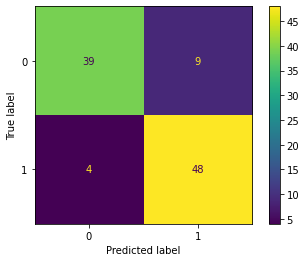

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,Y_pred_svc,labels=svc.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

disp.plot()
plt.show()

###SVM Roc Curve

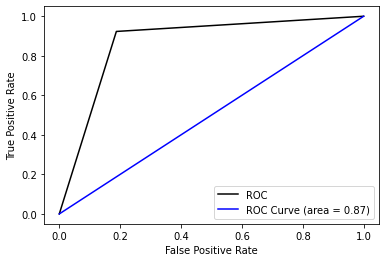

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred_svc)
roc_score = roc_auc_score(y_test,Y_pred_svc)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'blue', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

###SVM Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(SVC(), X_train_transform, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.001, 1.0, 40))

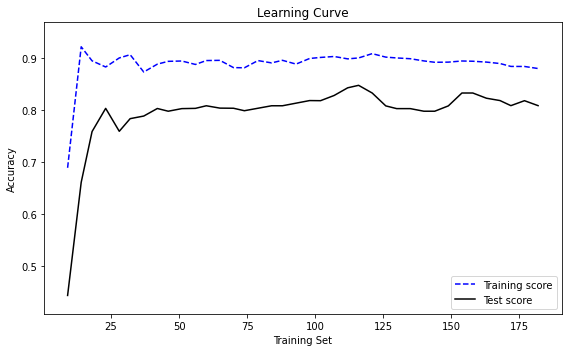

In [ ]:
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.subplots(1, figsize=(8,5))
    plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
    plt.plot(train_sizes, test_mean, color="black", label="Test score")

   
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
    plt.title("Learning Curve")
    plt.xlabel("Training Set"), plt.ylabel("Accuracy"), plt.legend(loc="lower right")
    plt.tight_layout(); 
    plt.show()

###SVM Error Graph

In [ ]:
error_rate_train = 1 - train_mean
error_rate_test = 1 - test_mean

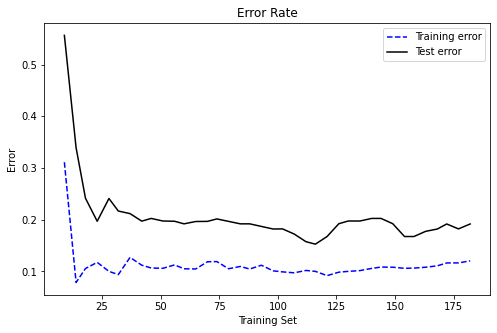

In [ ]:
plt.subplots(1, figsize=(8,5))
plt.plot(train_sizes, error_rate_train, '--', color="blue",  label="Training error")
plt.plot(train_sizes, error_rate_test, color="black", label="Test error")
plt.title("Error Rate")
plt.xlabel("Training Set"), plt.ylabel("Error")
plt.legend(loc="upper right")

####Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_transform,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001, kernel='sigmoid')


In [ ]:
grid_predictions = grid.predict(X_test_transform)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[38 10]
 [ 4 48]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        48
           1       0.83      0.92      0.87        52

    accuracy                           0.86       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print('Train Accuracy:',rf.score(X_train,y_train)*100)
print('Test Accuracy:',rf.score(X_test,y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 84.0


In [ ]:
Y_pred_rf=rf.predict(X_test)

###RF Confusion Matrix

In [ ]:
print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.81      0.90      0.85        52

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [ ]:
cm=confusion_matrix(y_test,Y_pred_rf,labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

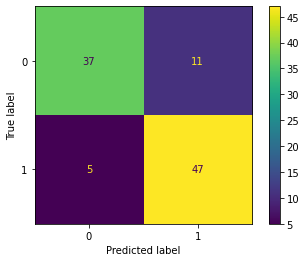

In [ ]:
disp.plot()
plt.show()

####Randomized Search

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=670, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=400)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[37 11]
 [ 5 47]]
Accuracy Score 0.84
Classification report:               precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.81      0.90      0.85        52

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



####Bayesian Optimization

In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [ ]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'] 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|██████████| 80/80 [07:20<00:00,  5.51s/it, best loss: -0.8278048780487806]


{'criterion': 0,
 'max_depth': 820.0,
 'max_features': 1,
 'min_samples_leaf': 0.16653278049634415,
 'min_samples_split': 0.13709396472141785,
 'n_estimators': 3}

In [ ]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 15, 1: 67, 2: 300, 3: 750, 4: 1200,5:1300,6:1550}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
sqrt
750


In [ ]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[37 11]
 [ 5 47]]
0.84
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.81      0.90      0.85        52

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



####Genetic Algorithms

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.8 MB/s 
     |████████████████████████████████| 193.6 MB 51 kB/s 
     |████████████████████████████████| 139 kB 55.4 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=844a5370a960f41ac6f9a4115b7d5285cf4b39e72229220be462658e6f0752b4
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.8/dist-packages/joblib/_par

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8279411764705882

Generation 2 - Current best internal CV score: 0.8279411764705882

Generation 3 - Current best internal CV score: 0.8279411764705882

Generation 4 - Current best internal CV score: 0.8280392156862745

Generation 5 - Current best internal CV score: 0.837843137254902

Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=800)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [ ]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.83


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_transform, y_train)

LogisticRegression()

In [ ]:
print('Train Accuracy:',lr.score(X_train_transform,y_train)*100)
print('Test Accuracy:',lr.score(X_test_transform,y_test)*100)

Train Accuracy: 82.75862068965517
Test Accuracy: 86.0


###LR Confusion Matrix

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        48
           1       0.84      0.90      0.87        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



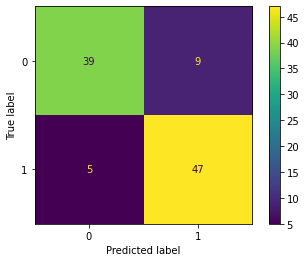

In [ ]:
Y_pred_lr=lr.predict(X_test_transform)
print(classification_report(y_test, Y_pred_lr))

cm=confusion_matrix(y_test,Y_pred_lr,labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

disp.plot()
plt.show()

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Train Accuracy:',dt.score(X_train,y_train)*100)
print('Test Accuracy:',dt.score(X_test,y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 83.0


###DT Confusion Matrix

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.82      0.87      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



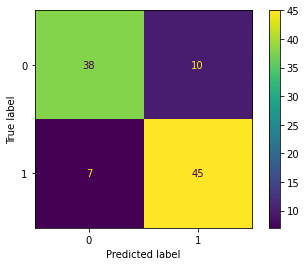

In [ ]:
Y_pred_dt=dt.predict(X_test)
print(classification_report(y_test, Y_pred_dt))

cm=confusion_matrix(y_test,Y_pred_dt,labels=dt.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)

disp.plot()
plt.show()

###MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver='lbfgs',alpha=0.01, random_state=101,max_iter=300, batch_size=100)
mlp.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=100, max_iter=300, random_state=101,
              solver='lbfgs')

In [ ]:
print('Train Accuracy:',mlp.score(X_train,y_train)*100)
print('Test Accuracy:',mlp.score(X_test,y_test)*100)

Train Accuracy: 84.23645320197043
Test Accuracy: 86.0


###MLP Confusion Matrix

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        48
           1       0.84      0.90      0.87        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



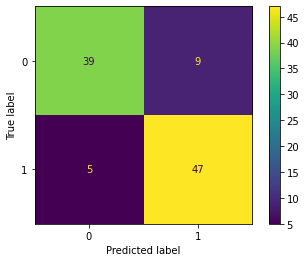

In [ ]:
Y_pred_mlp=mlp.predict(X_test)
print(classification_report(y_test, Y_pred_mlp))

cm=confusion_matrix(y_test,Y_pred_mlp,labels=mlp.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()
plt.show()

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
print('Train Accuracy:',nb.score(X_train,y_train)*100)
print('Test Accuracy:',nb.score(X_test,y_test)*100)

Train Accuracy: 85.22167487684729
Test Accuracy: 86.0


###NB Confusion Matrix

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        48
           1       0.87      0.87      0.87        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



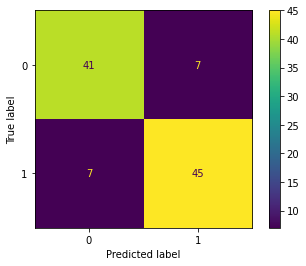

In [ ]:
Y_pred_nb=nb.predict(X_test)
print(classification_report(y_test, Y_pred_nb))

cm=confusion_matrix(y_test,Y_pred_nb,labels=nb.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

disp.plot()
plt.show()